# 1.Importing and pre processing the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

data = pd.read_excel("DadosENEM2021_Bahia_Jiquirica.xlsx")

race = {
    0 : "Não declarado",
    1: "Branca",
    2 : "Preta",
    3: "Parda",
    4:  "Amarela",
    5: "Indígena",
    6: "Não dispõe da informação"
}

civil_status = {
    0: "Não informado",
    1: "Solteiro(a)",
    2: "Casado(a)/Mora com companheiro(a)",
    3: "Divorciado(a)/Desquitado(a)/Separado(a)",
    4: "Viúvo(a)"
}

data["TP_COR_RACA"] = data["TP_COR_RACA"].map(race)
data["TP_ESTADO_CIVIL"] = data["TP_ESTADO_CIVIL"].map(civil_status)
data = data.rename(columns = {"TP_SEXO":"Sexo","TP_COR_RACA" : "Raça/Cor", "TP_ESTADO_CIVIL": "Estado_Civil","NU_NOTA_CN" : "Nota CN","NU_NOTA_CH" : "Nota CH","NU_NOTA_LC" : "Nota LC"})
data.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,Sexo,Estado_Civil,Raça/Cor,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210052349909,2021,2,Masculino,Solteiro(a),Parda,1,2,0,2,...,B,A,A,B,A,A,B,A,B,A
1,210053706496,2021,11,Feminino,Casado(a)/Mora com companheiro(a),Preta,2,1,0,1,...,A,A,A,B,B,A,B,A,A,A
2,210053792450,2021,3,Masculino,Solteiro(a),Branca,1,2,0,2,...,B,B,A,B,A,B,C,A,B,B
3,210052620264,2021,2,Masculino,Solteiro(a),Parda,1,3,0,1,...,A,A,A,B,A,A,B,A,A,A
4,210052556707,2021,4,Feminino,Solteiro(a),Parda,1,1,2,1,...,A,A,A,B,A,A,D,A,A,B


# 2. Frequency of the parctipants based on their gender


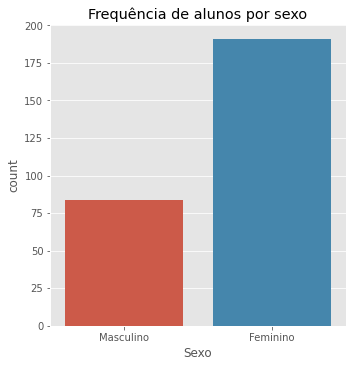

In [ ]:
sns.catplot(x = "Sexo", kind = "count",data = data).set(title='Frequência de alunos por sexo')


# 3. Table of the marital status of the partcipants



In [ ]:

sex_and_civil_status = data.groupby(by = ["Sexo", "Estado_Civil"]).size().unstack()
print("Tabela de estados civil por sexo")
sex_and_civil_status

Tabela de estados civil por sexo


Estado_Civil,Casado(a)/Mora com companheiro(a),Divorciado(a)/Desquitado(a)/Separado(a),Não informado,Solteiro(a)
Sexo,,,,
Feminino,8.0,1.0,4.0,178.0
Masculino,4.0,2.0,NaN,78.0


# 4. Table of the median and mean for each area of knowledge

In [ ]:
cn_mean = data["NU_NOTA_CN"].mean()
cn_median = data["NU_NOTA_CN"].median()

ch_mean = data["NU_NOTA_CH"].mean()
ch_median = data["NU_NOTA_CH"].median()

lc_mean = data["NU_NOTA_LC"].mean()
lc_median = data["NU_NOTA_LC"].median()

mt_mean = data["NU_NOTA_MT"].mean()
mt_median = data["NU_NOTA_MT"].median()

red_mean = data["NU_NOTA_REDACAO"].mean()
red_median = data["NU_NOTA_REDACAO"].median()



grades_data = {
    "Prova":["CN","CH","LC","MT","RED"],
     "Média":[cn_mean,ch_mean,lc_mean,mt_mean,red_mean],
     "Mediana":[cn_median,ch_median,lc_median,mt_median,red_median]
}
grades = pd.DataFrame(grades_data)
grades

,Prova,Média,Mediana
0,CN,460.661194,452.9
1,CH,483.478673,469.4
2,LC,467.003791,459.1
3,MT,487.159204,472.7
4,RED,570.426540,580.0


# 4. Tabel of the standart variation, variance and variance coeficient for each area of knowledge

In [ ]:
cn_std = data["NU_NOTA_CN"].std()
cn_var= data["NU_NOTA_CN"].var()


ch_std = data["NU_NOTA_CH"].std()
ch_var= data["NU_NOTA_CH"].var()

lc_std = data["NU_NOTA_LC"].std()
lc_var= data["NU_NOTA_LC"].var()


mt_std = data["NU_NOTA_MT"].std()
mt_var= data["NU_NOTA_MT"].var()

red_std = data["NU_NOTA_REDACAO"].std()
red_var= data["NU_NOTA_REDACAO"].var()


grades_variability = {
    "Prova":["CN","CH","LC","MT","RED"],
     "Desvio Padrão":[cn_std,ch_std,lc_std,mt_std,red_std],
     "Variância":[cn_var,ch_var,lc_var,mt_var,red_var],
      "CV": [cn_std/cn_mean,ch_std/ch_mean,lc_std/lc_mean,mt_std/mt_mean,red_std/red_mean]
}

grades_variability_dataframe = pd.DataFrame(grades_variability)
grades_variability_dataframe

,Prova,Desvio Padrão,Variância,CV
0,CN,67.145609,4508.532787,0.145759
1,CH,80.926769,6549.141972,0.167384
2,LC,73.688991,5430.067414,0.157791
3,MT,83.068694,6900.407927,0.170517
4,RED,195.972078,38405.055292,0.343554


# 5. Boxplot of the grades of the language exam per sex

[Text(0.5, 1.0, 'Notas na prova de Linguagens por Sexo')]

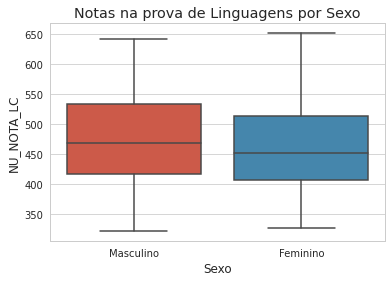

In [ ]:
"""
Boxplot
"""

#pt-br : Como não tem nenhum diamante no grafico entao nao tem outliers
#en : as there is no diamond on the boxplot we can see that there isnt outliers
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Sexo', y = 'NU_NOTA_LC', data = data).set(title='Notas na prova de Linguagens por Sexo')


# 5. Boxplot of the grades of the math exam per sex

[Text(0.5, 1.0, 'Notas na prova de Matemática por Sexo')]

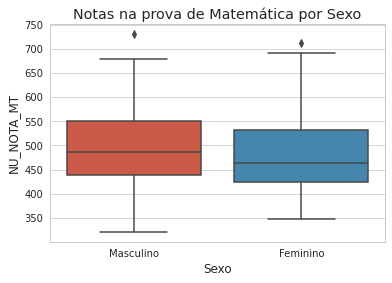

In [ ]:

  
sns.boxplot(x = 'Sexo', y = 'NU_NOTA_MT', data = data).set(title='Notas na prova de Matemática por Sexo')


[Text(0.5, 1.0, 'Notas na prova de Matemática por Raça/Cor')]

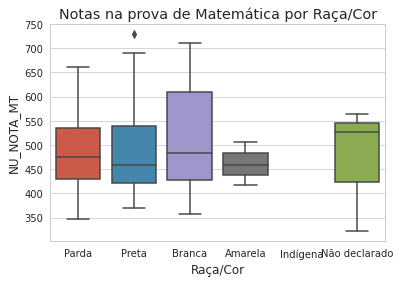

In [ ]:
sns.boxplot(x = 'Raça/Cor', y = 'NU_NOTA_MT', data = data).set(title='Notas na prova de Matemática por Raça/Cor')